<a href="https://colab.research.google.com/github/MandilJThapa/Landsat-Time-Series-Analysis-for-Multi-Temporal-Land-Cover-Classification/blob/master/Satellite_Imagery_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import random

In [ ]:
minmaxscaler= MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -lah '/content/drive/MyDrive/dataset_satellite/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Feb 11 05:26  classes.json
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 1'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 2'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 3'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 4'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 5'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 6'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 7'
drwx------ 4 root root 4.0K Feb 11 05:41 'Tile 8'


In [ ]:
dataset_root_folder= '/content/drive/MyDrive/dataset_satellite'

In [ ]:
dataset_name= "Semantic segmentation dataset"

In [ ]:
# To get all images---------------------------------------------------------------------
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name= path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    # print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.jpg')):
        # print(image_name)
        pass

In [ ]:
image_path_size= 256

In [ ]:
image= cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
image_patches= patchify(image, (image_path_size, image_path_size,3), step= image_path_size)

In [ ]:
len(image_patches)

2

In [ ]:
image_x = image_patches[0,0,:,:].shape
image_x = np.array(image_x)
minmaxscaler= MinMaxScaler()
image_y= minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [ ]:
(image.shape[0]// image_path_size)*image_path_size

512

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 20):
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    size_x = (image.shape[1] // image_path_size) * image_path_size
                    size_y = (image.shape[0] // image_path_size) * image_path_size
                    image = Image.fromarray(image)
                    image = image.crop((0, 0, size_x, size_y))
                    image = np.array(image)

                patched_images = patchify(image, (image_path_size, image_path_size, 3), step=image_path_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i, j, :, :]
                            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i, j, :, :]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)


In [ ]:
len(image_dataset)

945

In [ ]:
len(mask_dataset)

945

In [ ]:
image_dataset= np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

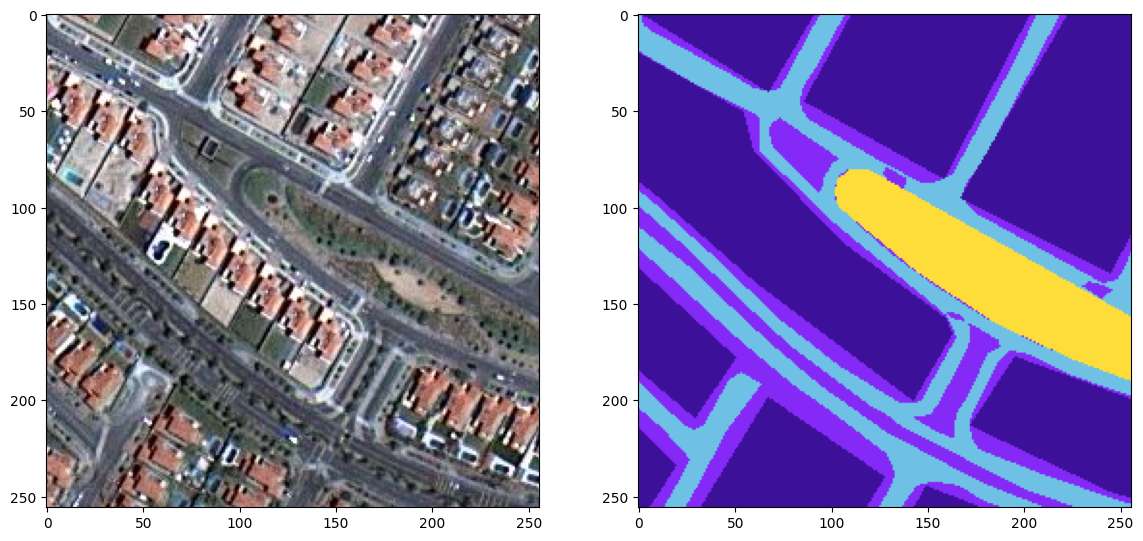

In [ ]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [162]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building= np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land= np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road= np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation= np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water  = class_water .lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_Unlabeled = '#9B9B9B'
class_Unlabeled = class_Unlabeled.lstrip('#')
class_Unlabeled= np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [168]:
label= individual_patched_mask


In [176]:
def rgb_to_label(label):
  label_segment= np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label== class_water, axis=-1)]= 0
  label_segment[np.all(label== class_land, axis=-1)]= 1
  label_segment[np.all(label== class_road, axis=-1)]= 2
  label_segment[np.all(label== class_building, axis=-1)]= 3
  label_segment[np.all(label== class_vegetation, axis=-1)]= 4
  label_segment[np.all(label== class_Unlabeled, axis=-1)]= 5
  label_segment= label_segment[:,:,0]

  return label_segment

In [177]:
labels= []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [178]:
labels=  np.array(labels)

In [179]:
labels= np.expand_dims(labels, axis=3)

In [181]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [182]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

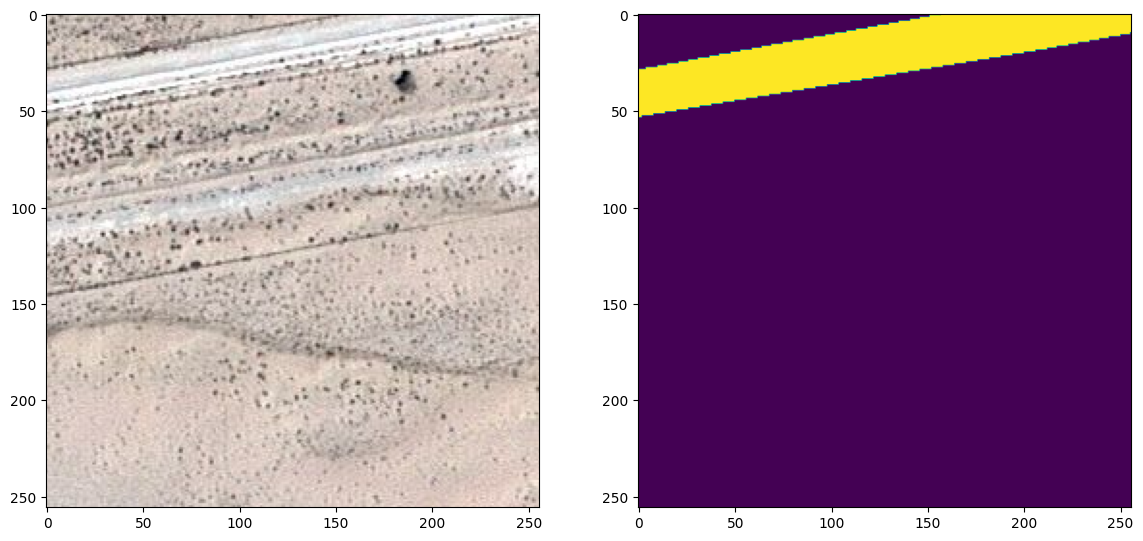

In [189]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
# plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [192]:
total_classes = len(np.unique(labels))

In [193]:
total_classes

6

In [194]:
from tensorflow.keras.utils import to_categorical

In [195]:
labels_categorical_datasets = to_categorical(labels, num_classes= total_classes)

In [196]:
labels_categorical_datasets.shape


(945, 256, 256, 6)

In [201]:
master_training_dataset.shape

(945, 256, 256, 3)

In [197]:
master_training_dataset= image_dataset

In [198]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test= train_test_split(master_training_dataset, labels_categorical_datasets, test_size = 0.15, random_state= 100)